## imports

In [30]:
!pip install wordcloud

In [31]:
import os
import pandas as pd

# related to data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


---------------------
---------------------

## Read dataset

In [3]:
parent_folder_path = os.path.dirname(os.getcwd())

In [6]:
name_dataset = "tiktok_google_play_reviews.csv"
path_dataset = os.path.join(parent_folder_path, "Datasets", name_dataset)


dataset = pd.read_csv(path_dataset)

In [7]:
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...,MR LOL GAMER,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,23.8.4,2022-04-05 23:18:30,NaN,NaN
1,gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...,Dino Kljako,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome app! Too many people on it where it's ...,5,0,NaN,2022-04-05 23:18:21,NaN,NaN
2,gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...,Olivia Harding,https://play-lh.googleusercontent.com/a/AATXAJ...,Not bad,5,0,23.9.5,2022-04-05 23:17:34,NaN,NaN
3,gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...,Keli We,https://play-lh.googleusercontent.com/a-/AOh14...,It is good,2,0,22.2.5,2022-04-05 23:17:04,NaN,NaN
4,gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...,Mavis Kotoka,https://play-lh.googleusercontent.com/a/AATXAJ...,Very interesting app,5,0,22.1.5,2022-04-05 23:17:04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
307052,gp:AOqpTOEX2qzcEhnamYxu8Jrnu4Ia0UtuHkajx6I1Y_j...,Nze Alpeace,https://play-lh.googleusercontent.com/a/AATXAJ...,"Best app ever let's do it ,very awesome let ev...",5,0,22.6.5,2022-01-17 10:44:38,NaN,NaN
307053,gp:AOqpTOHnBTSFCqxFYSsNrg4vztYn-Z0Gg3aCIGLliRK...,Shalina Sayed,https://play-lh.googleusercontent.com/a/AATXAJ...,I LOVE TIKTOK,5,0,22.8.4,2022-01-17 10:44:31,NaN,NaN
307054,gp:AOqpTOEuzjdo0NhbqpSBB18hhKP8X6FNPDOWVsan_TA...,ntokozo zondi,https://play-lh.googleusercontent.com/a/AATXAJ...,The videos are amazing...such an amazing app,5,0,22.8.4,2022-01-17 10:43:06,NaN,NaN
307055,gp:AOqpTOFoaOhvxddyVQPQJHpv9f4kgn2u2kkniAWQTRM...,Asika Emeka,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice app,5,0,NaN,2022-01-17 10:42:27,NaN,NaN


-----------------
-----------------

## Select relevant columns

In [9]:
columns = ["content","score"]
dataset = dataset[columns]
dataset[:10]

,content,score
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5
5,I love This app u can even make good friend an...,5
6,Pleas for you my video and like All,5
7,They suspended my phine for no reason tiktok u...,1
8,Good,5
9,Good,5


----------
----------

## Create a more generic NLP-related dataframe

In [12]:
df = pd.DataFrame()
df["Text"] = dataset["content"]
df["Output"] = dataset["score"]
df

,Text,Output
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5
...,...,...
307052,"Best app ever let's do it ,very awesome let ev...",5
307053,I LOVE TIKTOK,5
307054,The videos are amazing...such an amazing app,5
307055,Nice app,5


-----------
-----------

## Data exploration

In [14]:
mapping_output_count = dict(df["Output"].value_counts(dropna=True))
mapping_output_count

{5: 232507, 1: 37080, 4: 17985, 3: 11652, 2: 7833}

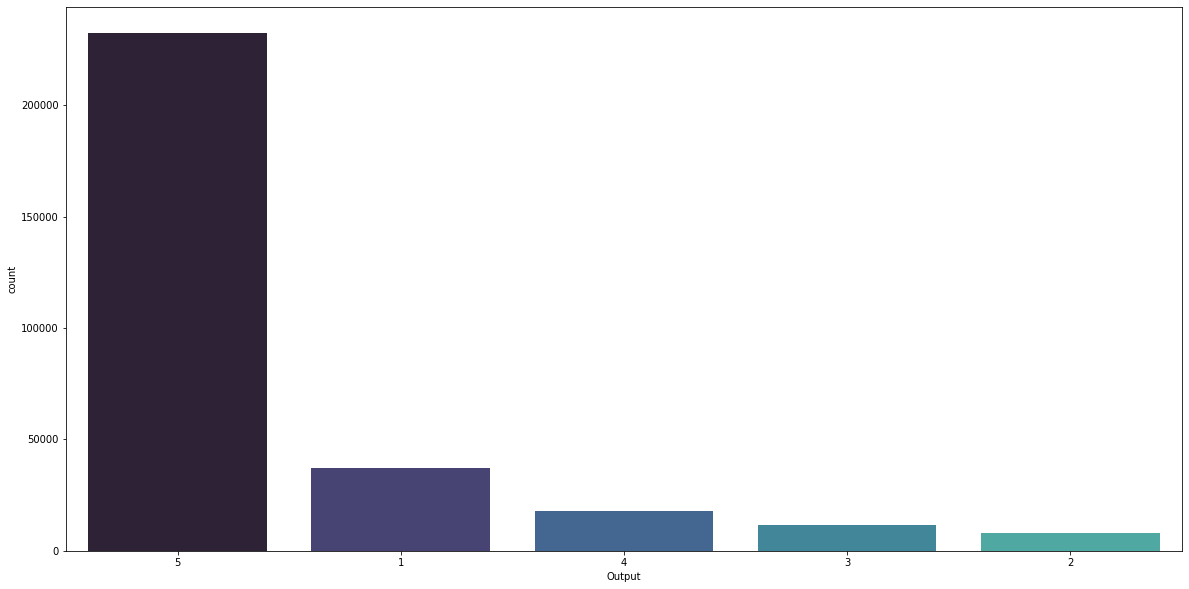

In [17]:
x = df["Output"]

plt.figure(figsize=(20,10))
ax = sns.countplot(x=x, order=x.value_counts(dropna=True).index, palette = sns.color_palette("mako"))


#### ----> Conclusion: Dataset is rather unbalanced! 

------------
------------

## Dealing with missing data


In [18]:
missing_datapoints = df.isna().sum()
missing_datapoints

Text      4
Output    0
dtype: int64

In [19]:
percent_missing_data = (missing_datapoints["Text"])/(df.size)
print("Percentage of data with NaN values: {}%".format(percent_missing_data*100))

Percentage of data with NaN values: 0.0006513448643085812%


#### ----> Conclusion: Practically no missing data! 

--------------
--------------

## Clean dataset

In [22]:
# Remove a row if any of the values is missing
df = df.dropna()
df = df.reset_index(drop=True)
df

,Text,Output
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5
...,...,...
307048,"Best app ever let's do it ,very awesome let ev...",5
307049,I LOVE TIKTOK,5
307050,The videos are amazing...such an amazing app,5
307051,Nice app,5


-----------
-----------

## Word cloud for Output

In [23]:
def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

#### Related to best rating (5 stars)

In [36]:
mapping_output_count

{5: 232507, 1: 37080, 4: 17985, 3: 11652, 2: 7833}

In [41]:
best_review = 5 # 5 stars

In [42]:
df_best_review_output = df[df["Output"] == best_review].reset_index(drop=True)
df_best_review_output

,Text,Output
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,Very interesting app,5
4,I love This app u can even make good friend an...,5
...,...,...
232499,"Best app ever let's do it ,very awesome let ev...",5
232500,I LOVE TIKTOK,5
232501,The videos are amazing...such an amazing app,5
232502,Nice app,5


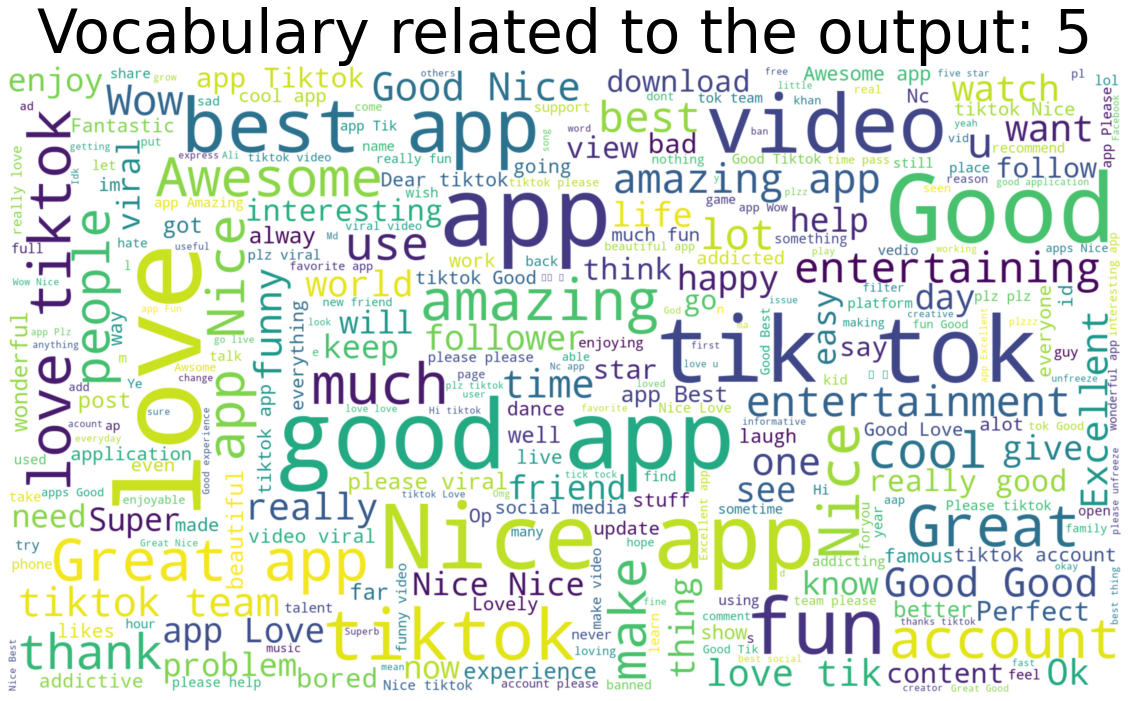

In [50]:
all_text_best_review_output = " ".join(df_best_review_output["Text"])
title = "Vocabulary related to the output: {}".format(best_review)
make_wordcloud(all_text_best_review_output,title)

#### Related to worst rating (1 star)


In [46]:
worst_review = 1 # 1 star

In [47]:
df_worst_review_output = df[df["Output"] == worst_review].reset_index(drop=True)
df_worst_review_output

,Text,Output
0,They suspended my phine for no reason tiktok u...,1
1,Just did recent update 4/3/22 . Videos stoppin...,1
2,Tik tok likes,1
3,i love this up so much this is the best app ever,1
4,My tiktok account alextheofficial98 got banned...,1
...,...,...
37074,Very bad content,1
37075,M first time use this app is change my Life th...,1
37076,It's a bad app And the tiktokrs are boring and...,1
37077,Good,1


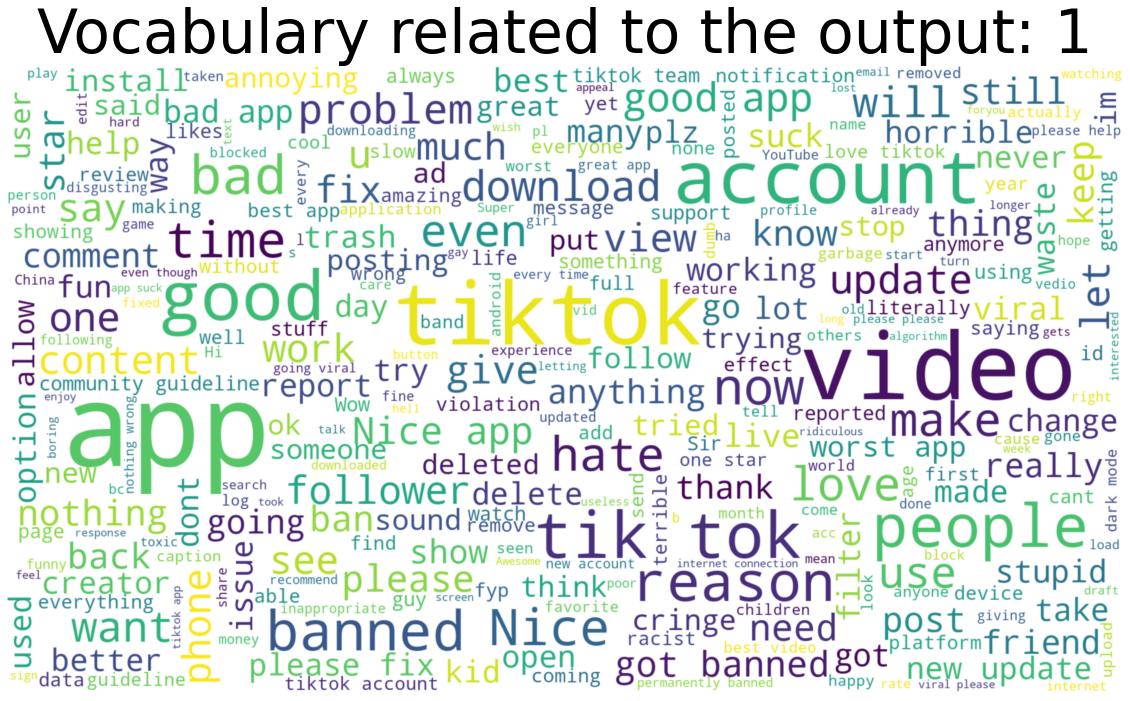

In [49]:
all_text_worst_review_output = " ".join(df_worst_review_output["Text"])
title = "Vocabulary related to the output: {}".format(worst_review)
make_wordcloud(all_text_worst_review_output,title)

------------
------------

## Top N words used

In [61]:
N = 20

#### best reviews - 5 stars 

In [62]:
df_count_words_best_review_output = pd.DataFrame(all_text_best_review_output.split(), columns = ['words'])
df_count_words_best_review_output

,words
0,Good
1,Awesome
2,app!
3,Too
4,many
...,...
1263709,app
1263710,plz
1263711,sapport
1263712,my


In [63]:
mapping_word_count_best_review_output = df_count_words_best_review_output["words"].value_counts()
mapping_word_count_best_review_output


app               51194
I                 42015
and               25483
is                24299
it                23422
                  ...  
Jesus.                1
rescue.               1
Messenger             1
behind.               1
amazing...such        1
Name: words, Length: 103347, dtype: int64

In [64]:
list_top_N_words_best_review_output = list(mapping_word_count_best_review_output[:N].index[:N])
list_top_N_words_best_review_output

['app',
 'I',
 'and',
 'is',
 'it',
 'love',
 'Good',
 'to',
 'the',
 'my',
 'good',
 'Nice',
 'this',
 'you',
 'a',
 'so',
 'tiktok',
 'like',
 'for',
 'very']

In [60]:
df_top_N_best_review_output = df_count_words_best_review_output[ df_count_words_best_review_output["words"].isin(list_top_N_words_best_review_output) ].reset_index(drop=True)
value_counts_top_N_best_review_output = df_top_N_best_review_output["words"].value_counts()
value_counts_top_N_best_review_output

app       51194
I         42015
and       25483
is        24299
it        23422
love      20070
Good      18928
to        18832
the       18689
my        18587
good      18348
Nice      17387
this      15076
you       14855
a         14049
so        10835
tiktok    10829
like      10649
for       10518
very       9206
Name: words, dtype: int64

Text(0.5, 1.0, 'Top 20 words used in text corresponding to best review: 5 stars')

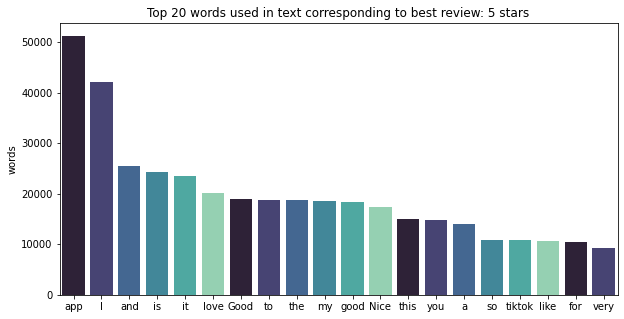

In [66]:
x = value_counts_top_N_best_review_output.index
y = value_counts_top_N_best_review_output

plt.figure(figsize=(10,5))
sns.barplot(x = x,y = y, palette = sns.color_palette("mako"))
plt.title("Top {} words used in text corresponding to best review: {} stars".format(N,best_review))

#### ----> Conclusion: Removing some stopwords (e.g.: I, it, and etc.) can be helpful! 

#### worst reviews - 1 star 

In [67]:
df_count_words_worst_review_output = pd.DataFrame(all_text_worst_review_output.split(), columns = ['words'])
df_count_words_worst_review_output

,words
0,They
1,suspended
2,my
3,phine
4,for
...,...
427733,America.
427734,Just
427735,another
427736,communist


In [68]:
mapping_word_count_worst_review_output = df_count_words_worst_review_output["words"].value_counts()
mapping_word_count_worst_review_output


I            12996
and           9666
the           8127
to            8021
app           7796
             ...  
piece.Ive        1
off,wont         1
Ieft             1
vids.App         1
Become           1
Name: words, Length: 45608, dtype: int64

In [69]:
list_top_N_words_worst_review_output = list(mapping_word_count_worst_review_output[:N].index[:N])
list_top_N_words_worst_review_output

['I',
 'and',
 'the',
 'to',
 'app',
 'my',
 'it',
 'is',
 'a',
 'for',
 'this',
 'of',
 'you',
 'not',
 'me',
 'but',
 'on',
 'no',
 'i',
 'account']

In [70]:
df_top_N_worst_review_output = df_count_words_worst_review_output[ df_count_words_worst_review_output["words"].isin(list_top_N_words_worst_review_output) ].reset_index(drop=True)
value_counts_top_N_worst_review_output = df_top_N_worst_review_output["words"].value_counts()
value_counts_top_N_worst_review_output

I          12996
and         9666
the         8127
to          8021
app         7796
my          7479
it          6733
is          6490
a           5210
for         4554
this        4275
of          3888
you         3881
not         3743
me          3412
but         3046
on          3002
no          2555
i           2483
account     2481
Name: words, dtype: int64

Text(0.5, 1.0, 'Top 20 words used in text corresponding to worst reviews: 1 star')

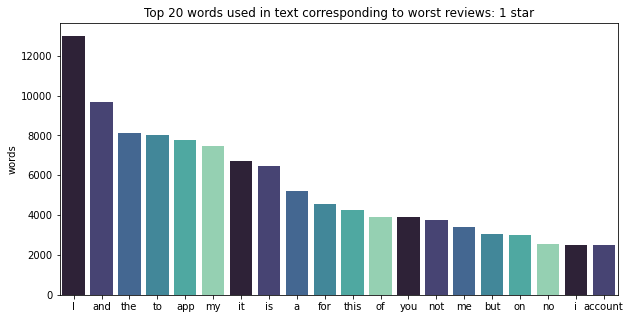

In [71]:
x = value_counts_top_N_worst_review_output.index
y = value_counts_top_N_worst_review_output

plt.figure(figsize=(10,5))
sns.barplot(x = x,y = y, palette = sns.color_palette("mako"))
plt.title("Top {} words used in text corresponding to worst reviews: {} star".format(N,worst_review))